# The dark matter halo of a galaxy from Illustris TNG
## Seha Lee
### Reading and plotting the data 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


In [4]:
Array = np.loadtxt( "/Users/sehalee/Downloads/BonusExercise2022_DarkMatter/GalaxyFromIllustrisTNG50Dark_DM_Subhalo852966.txt" )
Pos = Array[:,0:3]
Mass = Array[:,3]

####
#The four columns are:
  # x coordinate of DM particle: in units of kpc
  # y coordinate of DM particle: in units of kpc
  # z coordinate of DM particle: in units of kpc
  # M: mass in units of Msun

# The coordinates are chosen such that the galaxy centre is in (0,0,0)
####

In [5]:
print("The shape of the array is: ", Array.shape)
print("The first 5 rows of the array are: \n x,y,z coordinates and the mass \n", Array[0:5,:])

The shape of the array is:  (2323050, 4)
The first 5 rows of the array are: 
 x,y,z coordinates and the mass 
 [[ 9.64088456e-02 -6.46346007e-02  5.53424159e-02  5.38464142e+05]
 [ 1.58756977e-01  3.97111692e-02 -1.27772402e-02  5.38464142e+05]
 [ 1.81569442e-01 -2.05996550e-02 -1.74689210e-01  5.38464142e+05]
 [ 1.07145711e-01 -1.99075073e-01  1.33866130e-01  5.38464142e+05]
 [ 8.82361332e-02 -5.18074682e-04  4.26508561e-02  5.38464142e+05]]


In [6]:
print("The maximum of each coordinates are: \n", np.max(Pos, axis=0),'\n')
print("The minimum of each coordinates are: \n", np.min(Pos, axis=0),'\n')
print("The size range of each coordinates are: \n", np.max(Pos, axis=0) - np.min(Pos, axis=0))

The maximum of each coordinates are: 
 [348.125691 403.041627 304.655274] 

The minimum of each coordinates are: 
 [-254.37297  -287.058823 -311.243398] 

The size range of each coordinates are: 
 [602.498661 690.10045  615.898672]


### **Task 1** Plot DM mass projections of the galaxy halo (in units of M⊙kpc−2). Do (x, y), (x, z) and (y, z) projections. Choose a box size of ±300 kpc. Hint: Use plt.hist2d to create the projections.


In [7]:
r = int(np.abs(np.min(Pos[:,0]))) # x-axis minimum into positive integer
print("The range of coordinates is from -", r, "to", r)

The range of coordinates is from - 254 to 254


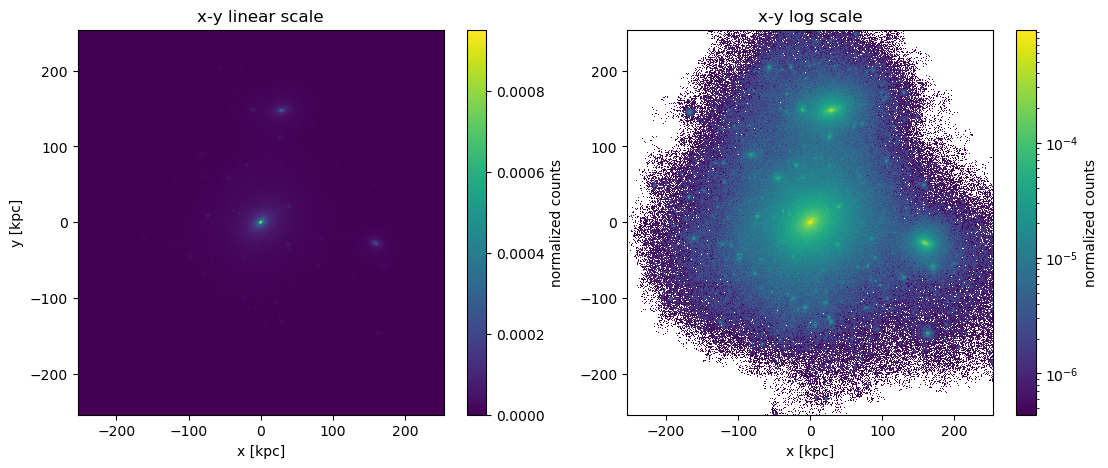

In [8]:
# Trial 1
#"density = True" makes normalized counts, not the physical density we want(mass per area)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
ranges = [[-r, r], [-r, r]]
bins = r*2

# linear scale
hist1 = axes[0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=True, norm ='linear') # weights = Mass/Area
axes[0].set_title('x-y linear scale')
axes[0].set_xlabel('x [kpc]')
axes[0].set_ylabel('y [kpc]')
fig.colorbar(hist1[3], ax=axes[0], label='normalized counts')

# log scale
hist2 = axes[1].hist2d(Pos[:,0], Pos[:,1], bins = bins,  range=ranges, weights=Mass, density=True, norm ='log')
axes[1].set_title('x-y log scale')
axes[1].set_xlabel('x [kpc]')
fig.colorbar(hist2[3], ax=axes[1], label='normalized counts')

plt.show()

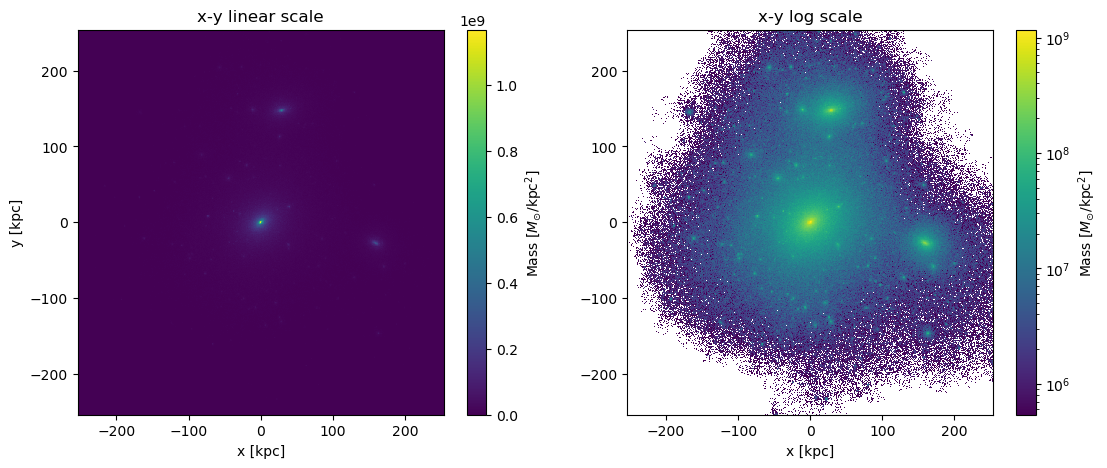

In [9]:
# Trial 2
# (x,y) projection of the galaxy in linear and log scale: log looks better 

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
r = int(np.abs(np.min(Pos[:,0]))) # x-axis minimum into positive integer
ranges = [[-r, r], [-r, r]]
bins = r*2

# linear scale
hist1 = axes[0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='linear') # weights = Mass/Area
axes[0].set_title('x-y linear scale')
axes[0].set_xlabel('x [kpc]')
axes[0].set_ylabel('y [kpc]')
fig.colorbar(hist1[3], ax=axes[0], label='Mass [$M_{\odot}$/kpc$^2$]')

# log scale
hist2 = axes[1].hist2d(Pos[:,0], Pos[:,1], bins = bins,  range=ranges, weights=Mass, density=False, norm ='log')
axes[1].set_title('x-y log scale')
axes[1].set_xlabel('x [kpc]')
fig.colorbar(hist2[3], ax=axes[1], label='Mass [$M_{\odot}$/kpc$^2$]')

plt.show()

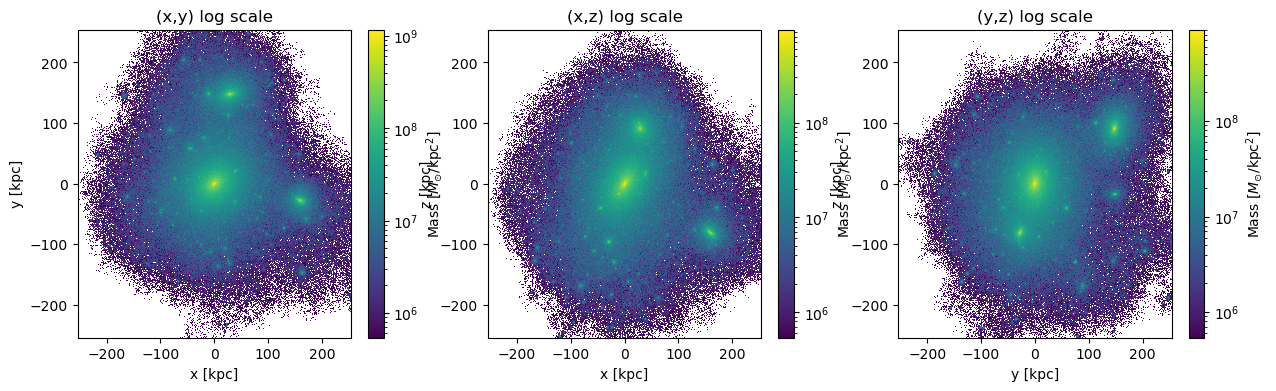

In [10]:
### Final Answer ###
# (x,y), (x,z), and (y,z) projection of the galaxy in linear and log scale
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
r = int(np.abs(np.min(Pos[:,0])))
ranges = [[-r, r], [-r, r]]
bins = r*2

hist_xy = axes[0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[0].set_title('(x,y) log scale')
axes[0].set_xlabel('x [kpc]')
axes[0].set_ylabel('y [kpc]')
fig.colorbar(hist_xy[3], ax=axes[0], label='Mass [$M_{\odot}$/kpc$^2$]')

hist_xz = axes[1].hist2d(Pos[:,0], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[1].set_title('(x,z) log scale')
axes[1].set_xlabel('x [kpc]')
axes[1].set_ylabel('z [kpc]')
fig.colorbar(hist_xz[3], ax=axes[1], label='Mass [$M_{\odot}$/kpc$^2$]')

hist_yz = axes[2].hist2d(Pos[:,1], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[2].set_title('(y,z) log scale')    
axes[2].set_xlabel('y [kpc]')
axes[2].set_ylabel('z [kpc]')
fig.colorbar(hist_yz[3], ax=axes[2], label='Mass [$M_{\odot}$/kpc$^2$]')
plt.show()

### **Task 2** Mark the locations of these galaxies in the projections from Task 1. Use circles or "x" symbols as markers.


In [11]:
# Trial 1
# Getting the locations of local maxima of the histogram by comparing with the 4 neighbors
# Too many miniscule maxima are found!

def local_max0(hist):
    maxima = np.zeros((0,2))
    for i in range(1, hist[0].shape[0]-1):
        for j in range(1, hist[0].shape[1]-1):
            if hist[0][i,j] >= np.max([hist[0][i-1,j], hist[0][i+1,j], hist[0][i,j-1], hist[0][i,j+1]]):
                x_center = 0.5 * (hist[1][i] + hist[1][i+1])
                y_center = 0.5 * (hist[2][j] + hist[2][j+1])
                maxima = np.vstack([maxima, [x_center, y_center]])
    return maxima


# first 20 maxima
#print(local_max0(hist_xy)[0:20])

In [12]:
# the location of the maxima using scatter plot 
#plt.scatter(local_max0(hist_xy)[:,0], local_max0(hist_xy)[:,1], color='skyblue', s=1)

(100, 2)


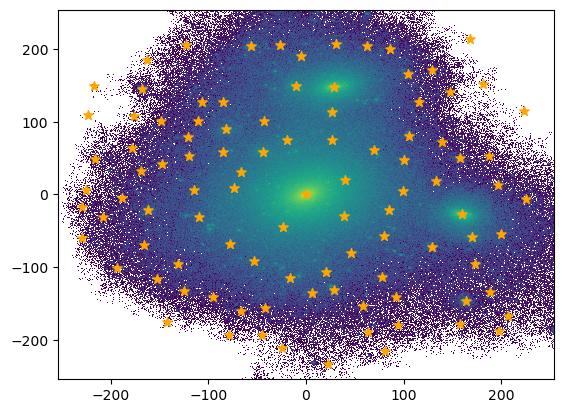

In [13]:
#Trial 2
# The min_distance parameter is adjustable
# Avoid finding too many miniscule maxima

from skimage.feature import peak_local_max

def local_max1(hist, min_distance=20):
    # Find peaks
    coordinates = peak_local_max(hist[0], min_distance=min_distance)
    
    # Calculate the center of each peak bin
    maxima = np.zeros((len(coordinates), 2))
    for i, (r, c) in enumerate(coordinates):
        x_center = 0.5 * (hist[1][r] + hist[1][r+1])
        y_center = 0.5 * (hist[2][c] + hist[2][c+1])
        maxima[i] = [x_center, y_center]
    

    return maxima

#print(local_max1(hist_xy))
print(local_max1(hist_xy).shape)

plt.hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
plt.scatter(local_max1(hist_xy)[:,0], local_max1(hist_xy)[:,1], color='orange', marker ='*', s=50)

[[  0.5   0.5]
 [ 28.5 147.5]
 [159.5 -27.5]
 [ 39.5  20.5]
 [-10.5 148.5]
 [-19.5  75.5]
 [-44.5  58.5]
 [-73.5   8.5]
 [ 23.5  16.5]
 [ 26.5 113.5]
 [-18.5 -23.5]
 [-37.5  14.5]
 [ 38.5 -29.5]
 [ 22.5 -12.5]
 [-23.5 -44.5]
 [-28.5  11.5]
 [-32.5 -12.5]]
(17, 2)


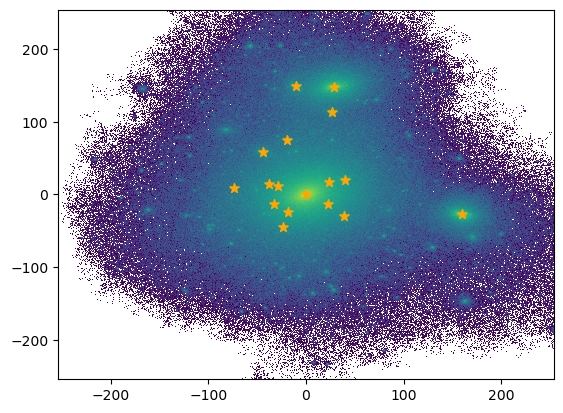

In [14]:
# Trial 3
# The threshold parameter is adjustable to avoid edge pixels

from skimage.feature import peak_local_max

min_distance = 5
threshold = 8E+7

def local_max2(hist, min_distance= min_distance, threshold=threshold):
    # Find peaks
    coordinates = peak_local_max(hist[0], min_distance=min_distance)
    
    # Calculate the center of each peak bin
    maxima = np.zeros((len(coordinates), 2))
    for i, (r, c) in enumerate(coordinates):
        if hist[0][r, c] > threshold:  # threshold here
            x_center = 0.5 * (hist[1][r] + hist[1][r+1])
            y_center = 0.5 * (hist[2][c] + hist[2][c+1])
            maxima[i] = [x_center, y_center]
    
    # Remove zero rows
    maxima = maxima[~np.all(maxima == 0, axis=1)]
    
    return maxima

print(local_max2(hist_xy))
print(local_max2(hist_xy).shape)

plt.hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
plt.scatter(local_max2(hist_xy)[:,0], local_max2(hist_xy)[:,1], color='orange', marker ='*', s=50)

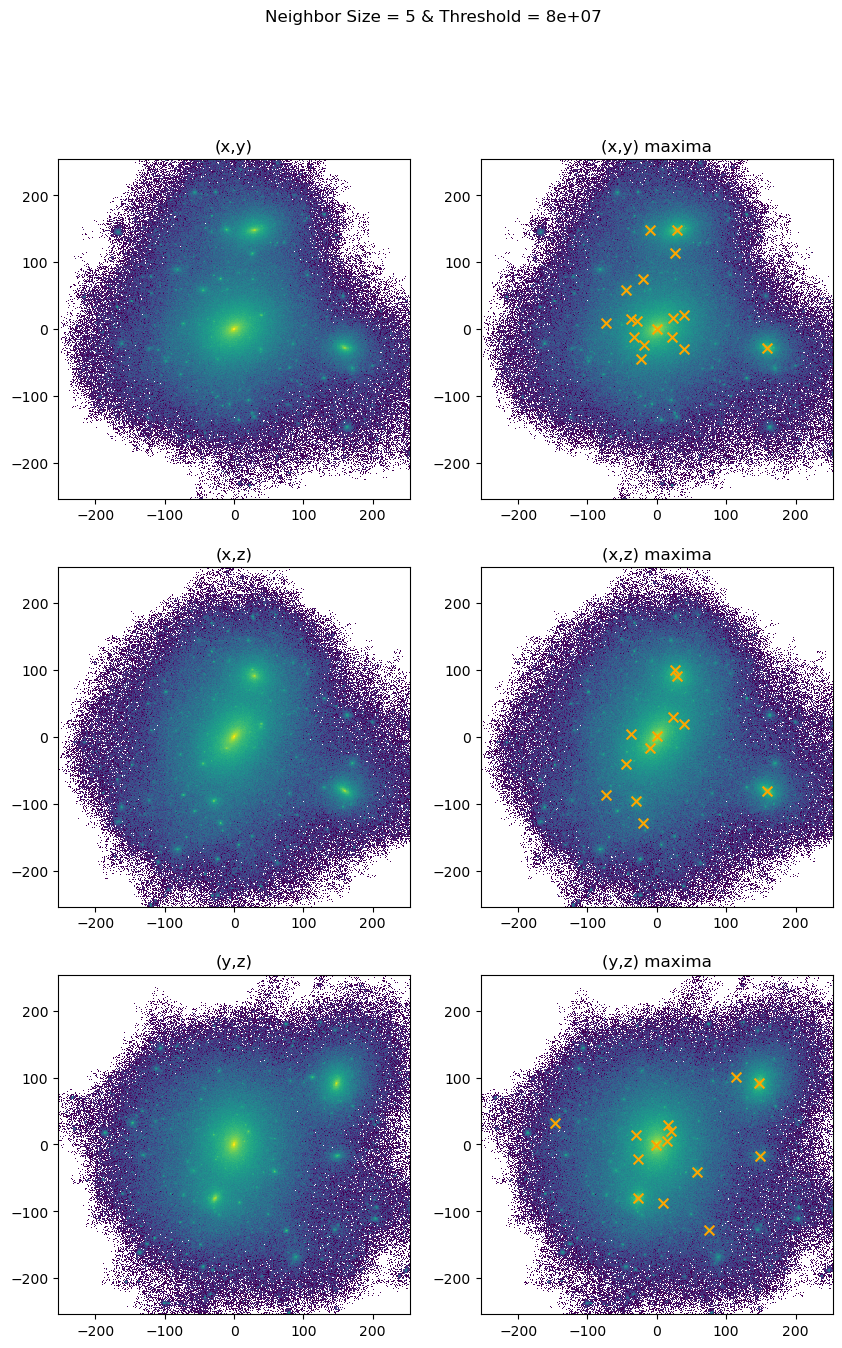

In [15]:
### Trial 4 ###
# 6 subplots 2*3 for comparision * each projection

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0,0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[0,1].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[0,1].scatter(local_max2(hist_xy)[:,0], local_max2(hist_xy)[:,1], color='orange', marker ='x', s=50)
axes[0,0].set_title('(x,y)')
axes[0,1].set_title('(x,y) maxima')

axes[1,0].hist2d(Pos[:,0], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[1,1].hist2d(Pos[:,0], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[1,1].scatter(local_max2(hist_xz)[:,0], local_max2(hist_xz)[:,1], color='orange', marker ='x', s=50)
axes[1,0].set_title('(x,z)')
axes[1,1].set_title('(x,z) maxima')

axes[2,0].hist2d(Pos[:,1], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[2,1].hist2d(Pos[:,1], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[2,1].scatter(local_max2(hist_yz)[:,0], local_max2(hist_yz)[:,1], color='orange', marker ='x', s=50)
axes[2,0].set_title('(y,z)')
axes[2,1].set_title('(y,z) maxima')

plt.suptitle('Neighbor Size = %s & Threshold = %.0e' % (min_distance, threshold))
plt.show()

In [16]:
print("xy:\n", local_max2(hist_xy).shape,"\n", local_max2(hist_xy)[:5])
print("xz:\n", local_max2(hist_xz).shape,"\n", local_max2(hist_xz)[:5])
print("yz:\n", local_max2(hist_yz).shape,"\n", local_max2(hist_yz)[:5])

xy:
 (17, 2) 
 [[  0.5   0.5]
 [ 28.5 147.5]
 [159.5 -27.5]
 [ 39.5  20.5]
 [-10.5 148.5]]
xz:
 (12, 2) 
 [[  0.5   0.5]
 [159.5 -80.5]
 [ 29.5  91.5]
 [-10.5 -17.5]
 [ 26.5 100.5]]
yz:
 (14, 2) 
 [[ -0.5  -0.5]
 [147.5  91.5]
 [-27.5 -80.5]
 [ 20.5  19.5]
 [148.5 -17.5]]


In [19]:
# print the (x,y,z) coordinates of the center of the galaxy from local_max2(hist_xy) and local_max2(hist_xz) and local_max2(hist_yz)
# if there are (a,b), (b,c), (c,a) coordinates, then the center of the galaxy is (a,b,c)
# save the coordinates of the center of the galaxy in a variable named centers and print it

centers = []

for i in range(local_max2(hist_xy).shape[0]):
    for j in range(local_max2(hist_xz).shape[0]):
        for k in range(local_max2(hist_yz).shape[0]):
            if (local_max2(hist_xy)[i][0] == local_max2(hist_xz)[j][0]) and (local_max2(hist_xy)[i][1] == local_max2(hist_yz)[k][0]) and (local_max2(hist_xz)[j][1] == local_max2(hist_yz)[k][1]):
                centers.append([local_max2(hist_xy)[i][0], local_max2(hist_xy)[i][1], local_max2(hist_xz)[j][1]])
                break

print("The center of the galaxy is: \n", centers)

The center of the galaxy is: 
 [[159.5, -27.5, -80.5], [39.5, 20.5, 19.5], [-10.5, 148.5, -17.5], [-44.5, 58.5, -40.5], [23.5, 16.5, 29.5], [26.5, 113.5, 100.5], [-37.5, 14.5, 4.5]]


##### The result of the code above (it takes 7 minutes to run it):
The center of the galaxy is: 
 [[159.5, -27.5, -80.5], [39.5, 20.5, 19.5], [-10.5, 148.5, -17.5], [-44.5, 58.5, -40.5], [23.5, 16.5, 29.5], [26.5, 113.5, 100.5], [-37.5, 14.5, 4.5]]


### **Task 3** Calculate the DM mass in each of the spherical shells.

##### Calculate the mass in each shell by looping over all bins, and then sum the mass from the DM particles residing in each shell. 
##### A fast method is to use the numpy.digitize function to calculate the bin of each DM particle, and numpy.bin_count to calculate the number of particles in each bin. 
##### Note, that these functions use a convention, where the first bin is an **underflow bin**: it counts the number of particles at a radius smaller than R[0]. The last bin is an **overflow bin** with particles with radius larger than R[-1]. So these bins have to be removed from the out- put of numpy.bin_count to make it compatible with our bin definition (as used by e.g. MidpointShell).


In [20]:
logR = np.linspace(-1.0, 2.5, 41)
R = 10.0**logR
VolumeOfShell = 4.0/3.0 * np.pi * ((R[1:])**3 - (R[:-1])**3)
MidpointShell = 0.5 * (R[1:] + R[:-1])
print(R[:5])
print(VolumeOfShell[:5])

[0.1        0.12232071 0.14962357 0.18302061 0.22387211]
[0.00347756 0.00636465 0.01164862 0.02131938 0.03901886]


In [21]:
MassInShell = np.zeros(len(VolumeOfShell))
bin_index = np.digitize(np.sqrt(Pos[:,0]**2 + Pos[:,1]**2 + Pos[:,2]**2), R)

# remove overflow and underflow bins
bin_count = np.bincount(bin_index)
bin_count = bin_count[1:]
bin_count = bin_count[:-1]

for i in range(1, len(VolumeOfShell)+1):
    MassInShell[i-1] = np.sum(Mass[bin_index == i])

print((np.sqrt(Pos[:,0]**2 + Pos[:,1]**2 + Pos[:,2]**2)[:5]),len(np.sqrt(Pos[:,0]**2 + Pos[:,1]**2 + Pos[:,2]**2)))
print(R[:6],len(R))
print(bin_index[:5],len(bin_index))
print(bin_count[:5],len(bin_count))
print(MassInShell[:5],len(MassInShell))

[0.1285888  0.16414631 0.25280057 0.26273795 0.098005  ] 2323050
[0.1        0.12232071 0.14962357 0.18302061 0.22387211 0.27384196] 41
[2 3 5 5 0] 2323050
[ 2  9 25 21 34] 40
[ 1076928.284  4846177.278 13461603.55  11307746.982 18307780.828] 40


### **Task 4** Calculate ρ as a function of R, and plot log ρ as a function of log R.

41 40


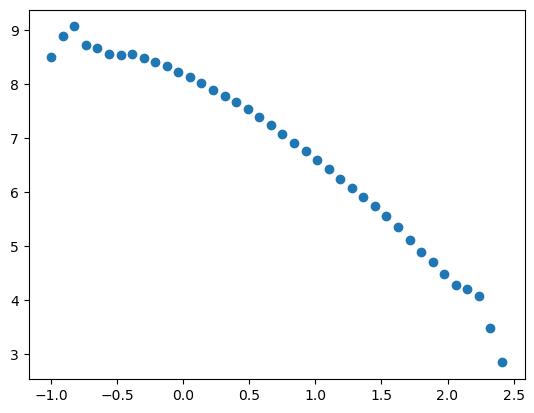

In [22]:
### **Task 4** Calculate ρ as a function of R, and plot log ρ as a function of log R.
rho = MassInShell / VolumeOfShell
logrho = np.log10(rho)
print(len(logR), len(logrho))
plt.plot(logR[:-1], logrho, 'o')

### **Task 5** Find the critical density, Ωcrit,0, at redshift 0 in a Planck15 cosmology, for example by using the astropy package.


An estimate of radius and mass of a cosmological halo (M200 and R200)
A commonly used measure of a halo’s radius is R200, which is the radius inside which the mean density is 200 times the critical density of the universe. M200 is the total mass inside R200.

$$\rho_c = \frac{3H^2}{8\pi G}$$
$$\Omega = \frac{\rho}{\rho_c}$$

12.914166055993048


/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_23026/2590275468.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(logR, np.log10(rho_avg),'+')


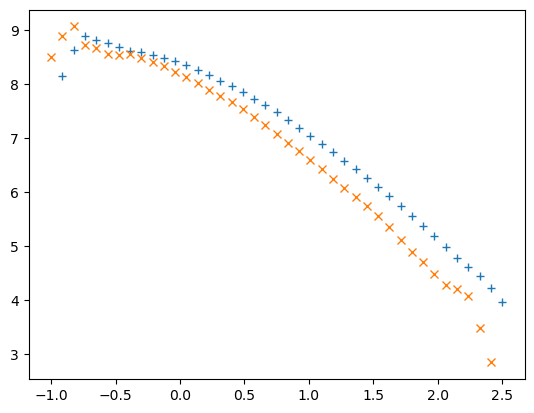

In [54]:
#An estimate of radius and mass of a cosmological halo (M200 and R200)
#A commonly used measure of a halo’s radius is R200, which is the radius inside which the mean density is 200 times the critical density of the universe. M200 is the total mass inside R200.
#Task 5 Find the critical density, Ωcrit,0, at redshift 0 in a Planck15 cosmology, for example by using the astropy package.

from astropy.cosmology import Planck15
from astropy.constants import G

H0 = Planck15.H0.value
rho_crit0 = 3.0 * H0**2 / (8.0 * np.pi * G.value)

print(np.log10(rho_crit0))

MasswithinR = np.zeros(len(R))

for i in range(len(R)):
    for j in range(i):
        MasswithinR[i] += MassInShell[j]

rho_avg = MasswithinR / (4.0/3.0 * np.pi * R**3)
plt.plot(logR, np.log10(rho_avg),'+')
plt.plot(logR[:-1],logrho,'x')
